In [13]:
import logging
from lvis import LVIS, LVISResults, LVISEval
import json
import os

#result and val files for 108 sampled classes.
# ROOT_PATH = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/ckp-fewshot-novel3"
# RESULT_PATH = os.path.join(ROOT_PATH, "Validation/lvis_dt.json")
# ANNOTATION_PATH = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_v0.5_val_top108.json"
# SAVE_PATH = os.path.join(ROOT_PATH, "Validation")
# sorted_id_json_file = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_sorted_id_test.json"
# ANN_TYPE = 'bbox'

# with open(sorted_id_json_file, 'r') as f:
#     sorted_id = json.load(f)
    
# lvis_eval = LVISEval(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE)
# lvis_eval.run()
# lvis_eval.print_results()

In [10]:
ROOT_PATH = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/ckp-fewshot-joint_baseline"
RESULT_PATH = os.path.join(ROOT_PATH, "Validation/lvis_dt.json")
ANNOTATION_PATH = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_v0.5_val_top108.json"
SAVE_PATH = os.path.join(ROOT_PATH, "Validation")
sorted_id_json_file = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_sorted_id_test.json"
ANN_TYPE = 'bbox'
with open(sorted_id_json_file, 'r') as f:
    sorted_id = json.load(f)
    
valid_cls_id108_base, sorted_cls_AP108_base =  get_sorted_AP(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE, SAVE_PATH, sorted_id)

category : 13 : 0.40000101052220266
category : 34 : 0.16938975164067757
category : 35 : 0.14206613714078975
category : 36 : 0.25987253789295167
category : 45 : 0.2808125989560837
category : 50 : 0.1635555689227357
category : 59 : 0.40003658061580816
category : 61 : 0.18643669360294418
category : 81 : 0.47109672773969674
category : 88 : 0.007652824105940006
category : 91 : 0.2512875368455633
category : 95 : 0.2889996928114554
category : 99 : 0.2828871859253491
category : 111 : 0.0
category : 118 : 0.21550832034125447
category : 124 : 0.12991324939525795
category : 126 : 0.2103000006959061
category : 132 : 0.19787420508798825
category : 133 : 0.24806804854578782
category : 139 : 0.3829536465162373
category : 154 : 0.3641619268266839
category : 179 : 0.20910653647287958
category : 183 : 0.2608729064997127
category : 197 : 0.13555451627188939
category : 208 : 0.3612027362499663
category : 211 : 0.3210464042627792
category : 221 : 0.2583775184663939
category : 237 : 0.13817938155533965
cate

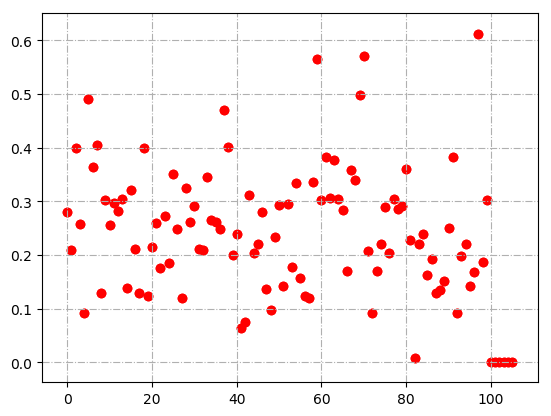

In [12]:
cls_id_108_head_base = np.arange(100)
plt.scatter(cls_id_108_head_base, sorted_cls_AP108_base[:100], color='r')

cls_id_108_tail_base = np.arange(100,106)
plt.scatter(cls_id_108_tail_base, sorted_cls_AP108_base[100:106], color='r')
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show()  

In [3]:
import logging
from lvis import LVIS, LVISResults, LVISEval, LVISEvalPerCat
import json
import os 
import numpy as np


def get_sorted_AP(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE, SAVE_PATH, sorted_id):
    lvis_eval = LVISEvalPerCat(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE, SAVE_PATH)
    lvis_eval.run()
    lvis_eval.print_results()

    lables_json_file = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/labels.json"
    result_AP_json_file = os.path.join(SAVE_PATH, 'lvis_result_percat_mAP.json')

    #show result AP by sorted 

    with open(lables_json_file, 'r') as f:
        lables = json.load(f)
    with open(result_AP_json_file, 'r') as f:
        result_AP = json.load(f)
   
    #num_class = len(sorted_id)
    sorted_cls_AP = []
    valid_cls_id = []
    for cls_i in sorted_id:
        if result_AP[str(cls_i)]!=-1:
            valid_cls_id.extend([cls_i])
            sorted_cls_AP.extend([result_AP[str(cls_i)]])
    return valid_cls_id, sorted_cls_AP

In [4]:
with open(sorted_id_json_file, 'r') as f:
    sorted_id = json.load(f)
    
valid_cls_id108, sorted_cls_AP108 =  get_sorted_AP(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE, SAVE_PATH, sorted_id)

category : 13 : 0.34808275708866593
category : 34 : 0.11184592057866771
category : 35 : 0.1141502298878484
category : 36 : 0.23238469056170769
category : 45 : 0.2540162784182284
category : 50 : 0.10569327600149038
category : 59 : 0.36462278173143203
category : 61 : 0.14919528166136414
category : 81 : 0.408194866326569
category : 88 : 0.00198019801980198
category : 91 : 0.20015808941832935
category : 95 : 0.22698279803116825
category : 99 : 0.22016708876348492
category : 111 : 0.02714521452145214
category : 118 : 0.1686888734884087
category : 124 : 0.10372687688936962
category : 126 : 0.17266279680624136
category : 132 : 0.13496732359140312
category : 133 : 0.2492463765244126
category : 139 : 0.2759845925860978
category : 154 : 0.31455043276045286
category : 179 : 0.1498390427887321
category : 183 : 0.2315286280161278
category : 197 : 0.07553148723607947
category : 208 : 0.31355093999275196
category : 211 : 0.3624023467176184
category : 221 : 0.21390517763238878
category : 237 : 0.10323

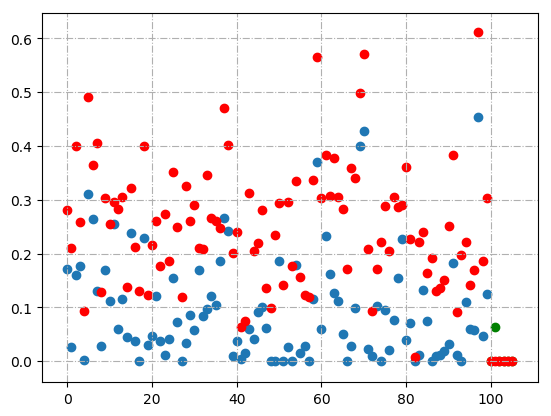

In [14]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cls_id_108_head = np.arange(100)
plt.scatter(cls_id_108_head, sorted_cls_AP108[:100])

cls_id_108_tail = np.arange(100,106)
plt.scatter(cls_id_108_tail, sorted_cls_AP108[100:106], color='g')


cls_id_108_head_base = np.arange(100)
plt.scatter(cls_id_108_head_base, sorted_cls_AP108_base[:100], color='r')

cls_id_108_tail_base = np.arange(100,106)
plt.scatter(cls_id_108_tail_base, sorted_cls_AP108_base[100:106], color='r')
# plt.bar(cls_id, sorted_cls_AP, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show()  

In [15]:
ROOT_PATH = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/ckp-fewshot-novel4"
RESULT_PATH = os.path.join(ROOT_PATH, "Validation/lvis_dt.json")
ANNOTATION_PATH = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_v0.5_val_top108.json"
SAVE_PATH = os.path.join(ROOT_PATH, "Validation")
sorted_id_json_file = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_sorted_id_test.json"
ANN_TYPE = 'bbox'
with open(sorted_id_json_file, 'r') as f:
    sorted_id = json.load(f)
    
valid_cls_id108_2, sorted_cls_AP108_2 =  get_sorted_AP(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE, SAVE_PATH, sorted_id)


category : 13 : 0.409001341006691
category : 34 : 0.12682043196841059
category : 35 : 0.12480731833242323
category : 36 : 0.2525043763110491
category : 45 : 0.2915613463348041
category : 50 : 0.1057340407083212
category : 59 : 0.34607008277724505
category : 61 : 0.15198127440240242
category : 81 : 0.44222942201769405
category : 88 : 0.01843184318431843
category : 91 : 0.26546135546143085
category : 95 : 0.27869118446121277
category : 99 : 0.29574874090890246
category : 111 : 0.03332039150034725
category : 118 : 0.19108357662461925
category : 124 : 0.21490026944493432
category : 126 : 0.21896736796286287
category : 132 : 0.2054150205087147
category : 133 : 0.2499986027860598
category : 139 : 0.35944677494498806
category : 154 : 0.3640803358729657
category : 179 : 0.2308481737946776
category : 183 : 0.27120508547796324
category : 197 : 0.10569631830952575
category : 208 : 0.40963617970368194
category : 211 : 0.3740541811106713
category : 221 : 0.24358034936609202
category : 237 : 0.14645

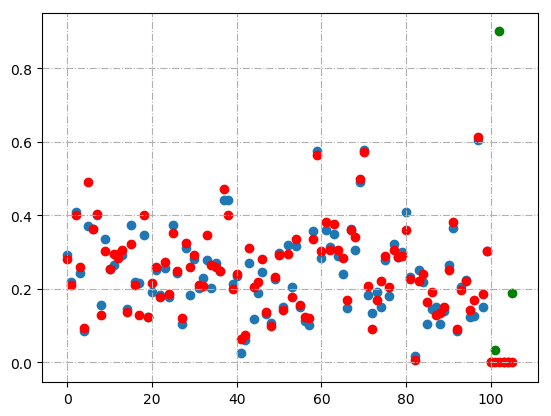

In [18]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cls_id_108_head = np.arange(100)
plt.scatter(cls_id_108_head, sorted_cls_AP108_2[:100])

cls_id_108_tail = np.arange(100,106)
plt.scatter(cls_id_108_tail, sorted_cls_AP108_2[100:106], color='g')

cls_id_108_head_base = np.arange(100)
plt.scatter(cls_id_108_head_base, sorted_cls_AP108_base[:100], color='r')

cls_id_108_tail_base = np.arange(100,106)
plt.scatter(cls_id_108_tail_base, sorted_cls_AP108_base[100:106], color='r')

# plt.bar(cls_id, sorted_cls_AP, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show()  

In [8]:
ROOT_PATH = "/mnt/data-disk0/xinting/LVIS/maskrcnn-benchmark/ckp-fewshot-novel2"
RESULT_PATH = os.path.join(ROOT_PATH, "Validation/lvis_dt.json")
ANNOTATION_PATH = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_v0.5_val_top108.json"
SAVE_PATH = os.path.join(ROOT_PATH, "Validation")
sorted_id_json_file = "/mnt/data-disk0/db_zhangdong/LVIS/lvis_sorted_id_test.json"
ANN_TYPE = 'bbox'
with open(sorted_id_json_file, 'r') as f:
    sorted_id = json.load(f)
    
valid_cls_id108, sorted_cls_AP108 =  get_sorted_AP(ANNOTATION_PATH, RESULT_PATH, ANN_TYPE, SAVE_PATH, sorted_id)

category : 13 : 0.1600118250191505
category : 34 : 0.057161225600769264
category : 35 : 0.059081962092420504
category : 36 : 0.1214047598250759
category : 45 : 0.17145545077317603
category : 50 : 0.07525243057115366
category : 59 : 0.22845244364570932
category : 61 : 0.0473950772078178
category : 81 : 0.2659032069880554
category : 88 : 0.0
category : 91 : 0.03152050919377652
category : 95 : 0.09430613726025637
category : 99 : 0.06054098591099828
category : 111 : 0.06336633663366334
category : 118 : 0.04672138991287778
category : 124 : 0.0
category : 126 : 0.02616540804100465
category : 132 : 0.0
category : 133 : 0.18547631951205765
category : 139 : 0.23286013920122192
category : 154 : 0.26382073775660164
category : 179 : 0.08356938828930716
category : 183 : 0.10478468536430044
category : 197 : 0.010794829482948293
category : 208 : 0.0392079207920792
category : 211 : 0.2380623766310608
category : 221 : 0.17717472992238506
category : 237 : 0.04418296494701698
category : 273 : 0.0
categor

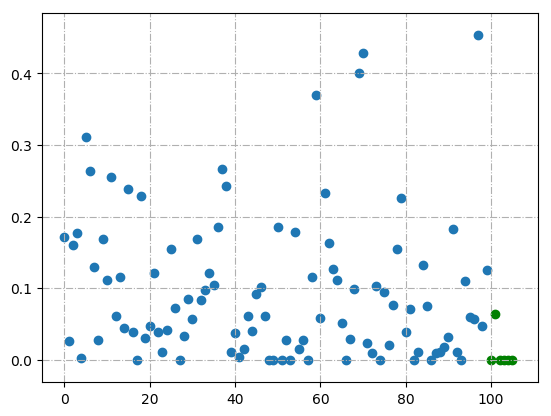

In [9]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cls_id_108_head = np.arange(100)
plt.scatter(cls_id_108_head, sorted_cls_AP108[:100])

cls_id_108_tail = np.arange(100,106)
plt.scatter(cls_id_108_tail, sorted_cls_AP108[100:106], color='g')
# plt.bar(cls_id, sorted_cls_AP, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
plt.grid(linestyle='-.',which='both')
# plt.title('Programming language usage')
plt.show()  